In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("purchase_prediction.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,1:]
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
catcols=list(df.select_dtypes(include=['object']).columns)
print("Categorical columns: ",catcols)

Categorical columns:  ['Gender']


In [7]:
numcols=list(df.select_dtypes(exclude=['object']).columns)
print("Continuous columns: \n",numcols)

Continuous columns: 
 ['Age', 'EstimatedSalary', 'Purchased']


In [10]:
### Checking for null or missing values
(df.isnull().sum()/len(df))*100

Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

In [12]:
#or we can calculate the missing values in this way also
df.isnull().mean()

Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

#### LabelEncode the 'Gender' column as it consists of object

In [13]:
from sklearn.preprocessing import LabelEncoder


In [14]:
le=LabelEncoder()
df["Gender"]=le.fit_transform(df["Gender"])

In [15]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           400 non-null    int32
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 11.1 KB


In [16]:
#### All the Data Has changed into continuous and descrete values and its fit for Modeling

#### Exploratory Data Analysis

In [17]:
(df.Purchased.value_counts(normalize=True))*100

0    64.25
1    35.75
Name: Purchased, dtype: float64

In [18]:
#Data was imbalanced and need to do some resampling techniques like (UPSAMPLING,SMOTE)

In [19]:
import plotly.graph_objects as go

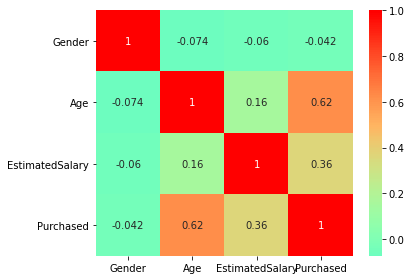

In [18]:
# plt.figure(figsize=(4,3))
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='rainbow',robust=True,center=0)
plt.tight_layout()
plt.show()

In [19]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


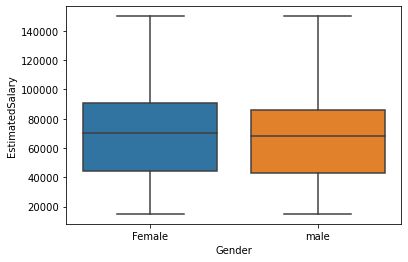

In [25]:
sns.boxplot(data=df,x="Gender",y="EstimatedSalary")
label=["Female","male"]
plt.xticks(ticks=[0,1], labels=label)
plt.show()

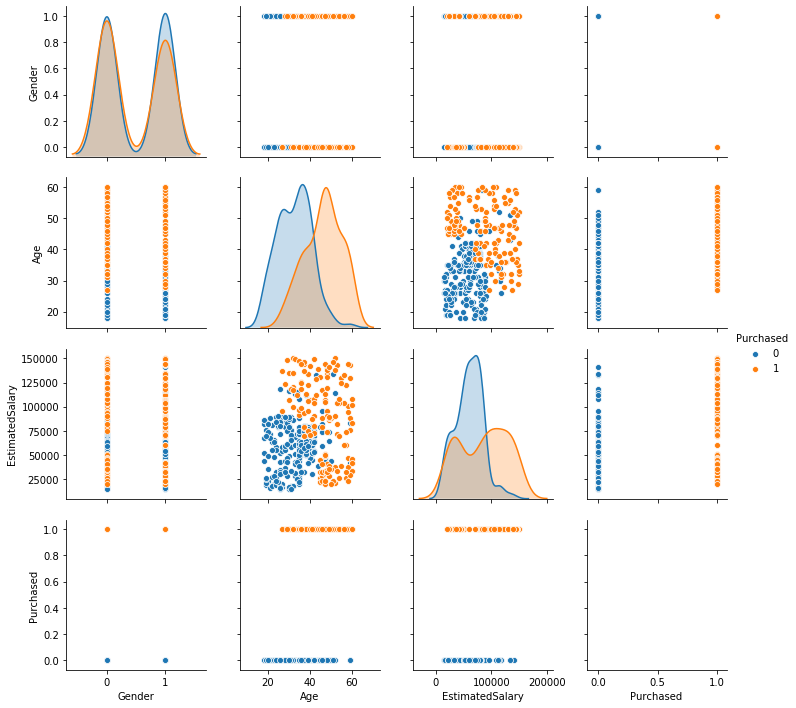

In [34]:
sns.pairplot(df,hue='Purchased',diag_kind='kde')
plt.show()

In [38]:
ct=pd.crosstab(df['Gender'],df['Purchased'],normalize=False).rename({0:"Female",1:"Male"},axis=0).rename({0:"Not Purchased",1:"Purchased"},axis=1)
ct

Purchased,Not Purchased,Purchased
Gender,,
Female,127,77
Male,130,66


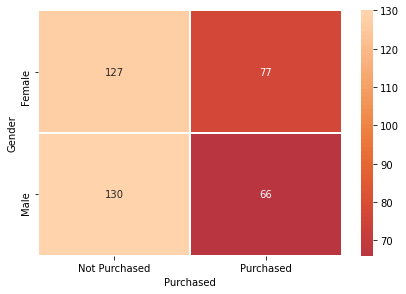

In [39]:
fig, ax = plt.subplots()
plt.tight_layout()
sns.heatmap(ct,annot=True, fmt="d", linewidths=.5,center=0)

### Since its a unblanced dataset, we need to perform resampling techniques

In [48]:
from  imblearn.over_sampling import SMOTE,KMeansSMOTE

In [49]:
df.shape

(400, 4)

In [41]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [58]:
# Separate input features and target
y = df.Purchased
X = df.drop('Purchased', axis=1)

In [59]:
smote = KMeansSMOTE(sampling_strategy='auto',  k_neighbors=5) # resample the minority class.

In [60]:
X,y=smote.fit_sample(X,y)

In [61]:
print("After Resampling the values are:")
y.value_counts()

After Resampling the values are:


1    258
0    257
Name: Purchased, dtype: int64

In [62]:
X.shape

(515, 3)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import KFold,cross_val_score


In [86]:
#finding out the most optimal estimator
from sklearn.model_selection import KFold,cross_val_score,cross_val_predict,GridSearchCV
params={'criterion':['entropy','gini']}
gdt=GridSearchCV(dt,param_grid=params,cv=3,scoring=scoring)
gdt.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini']}, scoring='roc_auc')

In [87]:
gdt.best_params_

{'criterion': 'gini'}

In [88]:
gdt.best_score_

0.8970801070169143

In [104]:
from sklearn import tree

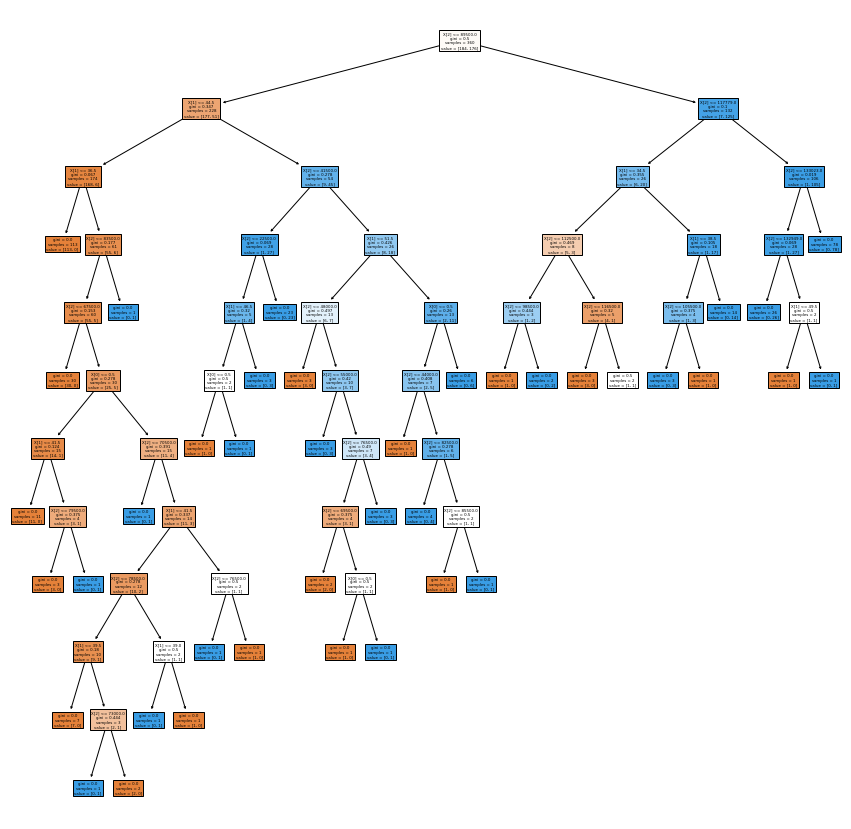

In [112]:
plt.figure(figsize=(15,15))
tree.plot_tree(dt,filled=True)
plt.savefig("Decision_tree.jpg")
plt.show()

In [116]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [107]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()
bag=BaggingClassifier()
model=[]
model.append(('Logistic Regression',lr))
model.append(('KNearest Neighbors',knn))
model.append(('Decision Tree',dt))
model.append(('Random Forest',rf))
model.append(('Naive Bayes',nb))
model.append(('Bagging Classifier',bag))
cols=[]
train=[]
test=[]
prc=[]
rec=[]
results = []
names = []
bias=[]
variance=[]
scoring = 'roc_auc'
for k,v in model:
    v.fit(X_train,y_train)
    y_pred=v.predict(X_test)
    Train=v.score(X_train,y_train)
    Test=v.score(X_test,y_test)
    precesion=metrics.precision_score(y_test,y_pred,average='macro')
    recall=precesion=metrics.recall_score(y_test,y_pred,average='macro')
    cols.append(k)
    train.append(Train)
    test.append(Test)
    prc.append(precesion)
    rec.append(recall)
    TEST=pd.DataFrame(test,columns=["TEST_Accuracy"],index=cols)
    TRAIN=pd.DataFrame(train,columns=["TRAIN_Accuracy"],index=cols)
    PRECISION=pd.DataFrame(prc,columns=["PRECISION"],index=cols)
    RECALL=pd.DataFrame(rec,columns=["RECALL"],index=cols)
for name,models in model:
    kfold = KFold(n_splits=10, random_state=0,shuffle=True)
    cv_results = cross_val_score(models, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    bias=np.mean(results)
    variance=np.var(results,ddof=1)
    names.append(name)
    BIAS=pd.DataFrame(bias,columns=["Bias_Error"],index=names)
    VARIANCE=pd.DataFrame(variance,columns=["Varaince_Error"],index=names)
data=pd.concat([TRAIN,TEST,PRECISION,RECALL,BIAS,VARIANCE],axis=1,)
data

,TRAIN_Accuracy,TEST_Accuracy,PRECISION,RECALL,Bias_Error,Varaince_Error
Logistic Regression,0.727778,0.696774,0.693869,0.693869,0.91476,0.00536
KNearest Neighbors,0.908333,0.845161,0.844637,0.844637,0.91476,0.00536
Decision Tree,0.997222,0.890323,0.889576,0.889576,0.91476,0.00536
Random Forest,0.997222,0.909677,0.909372,0.909372,0.91476,0.00536
Naive Bayes,0.927778,0.877419,0.877381,0.877381,0.91476,0.00536
Bagging Classifier,0.994444,0.909677,0.908620,0.908620,0.91476,0.00536


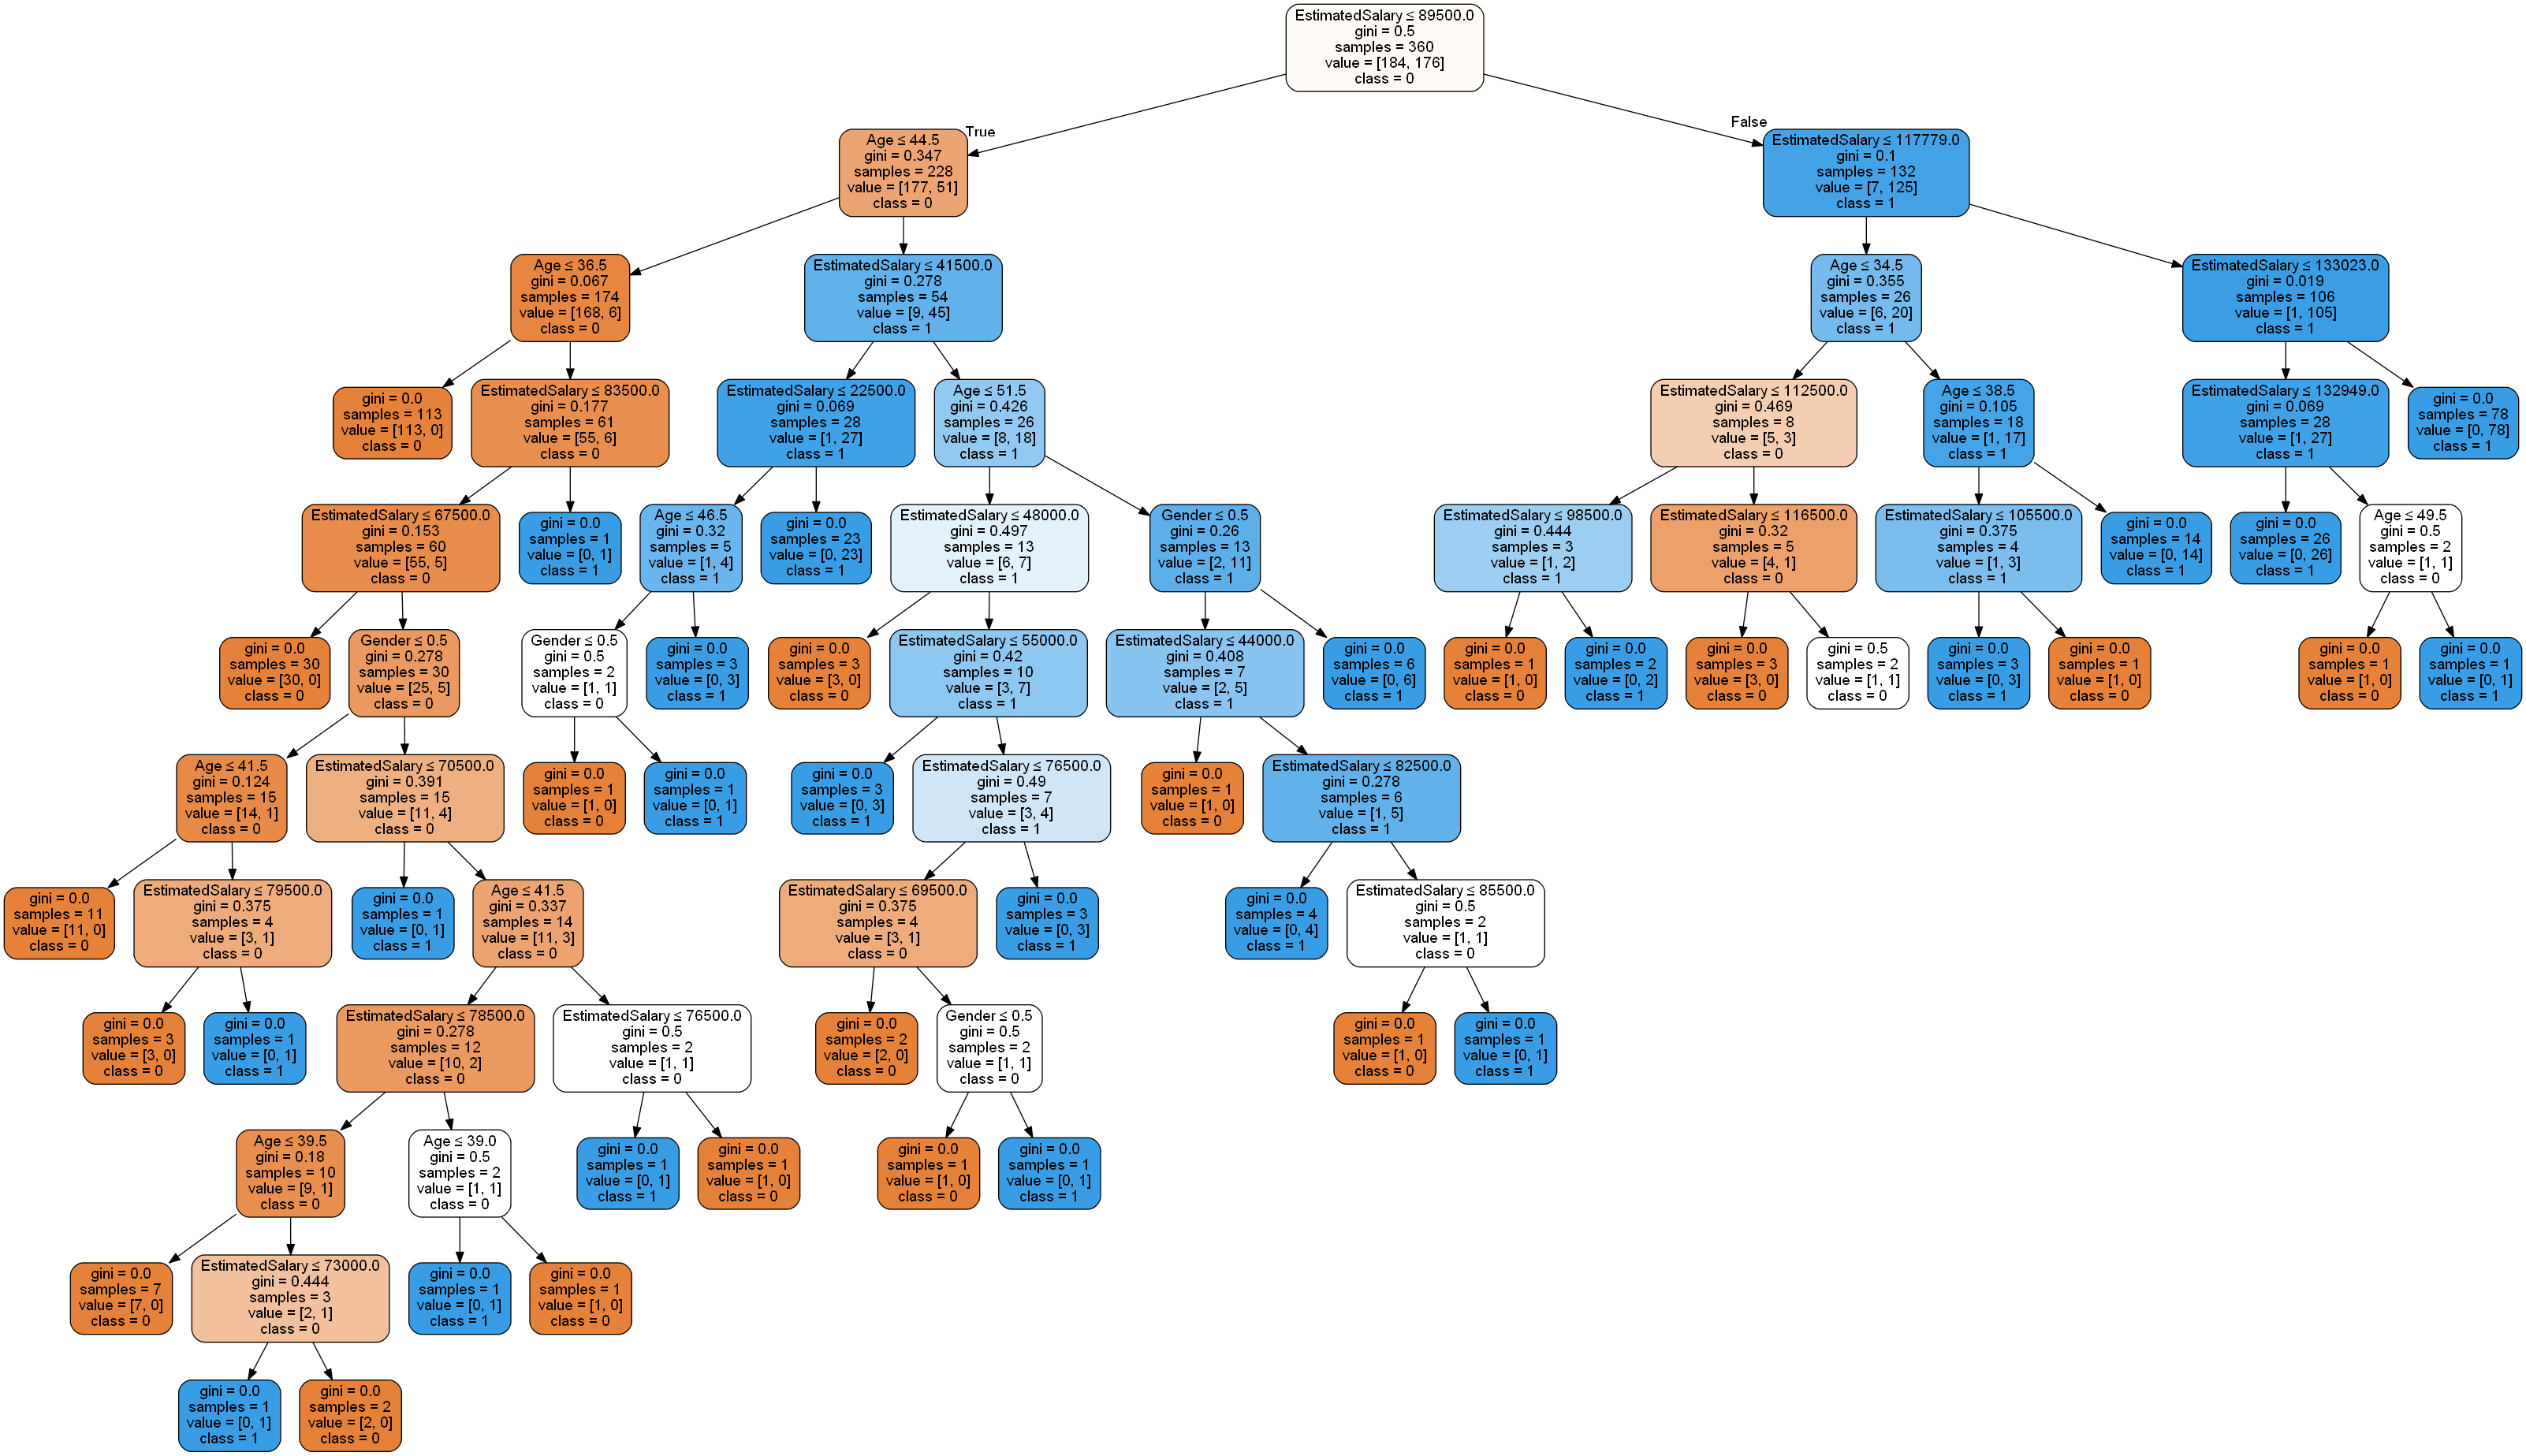

In [118]:
# feature_cols=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
dot_data=StringIO()
export_graphviz(dt,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns,
                class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

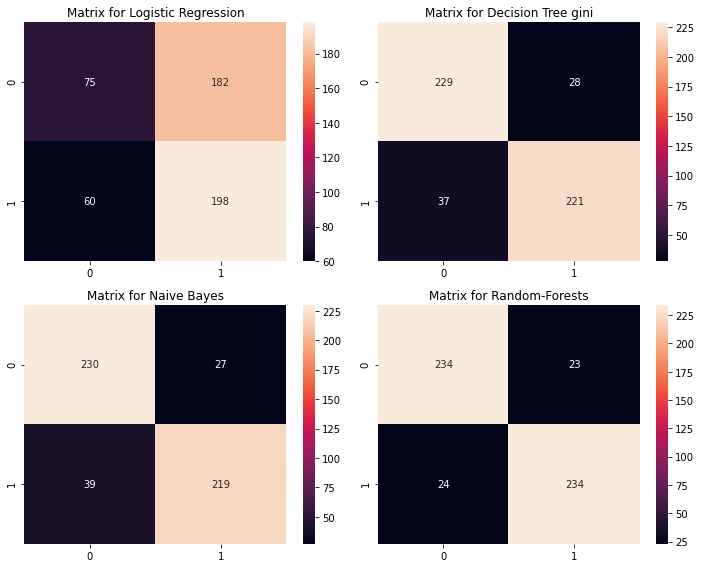

<Figure size 432x288 with 0 Axes>

In [120]:
from sklearn.model_selection import cross_val_predict
from mlxtend.evaluate import confusion_matrix
f,ax=plt.subplots(2,2,figsize=(10,8))
plt.title("CONFUSION MATRIX OF ALL MODELS")
y_pred = cross_val_predict(LogisticRegression(multi_class='multinomial',solver='lbfgs'),X,y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for Logistic Regression')
y_pred_dt_gini_train = cross_val_predict(DecisionTreeClassifier(criterion='gini',random_state=0),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred_dt_gini_train,binary=True),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Decision Tree gini')
y_pred = cross_val_predict(GaussianNB(),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Naive Bayes')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=12,random_state=0),X, y,cv=10)
sns.heatmap(confusion_matrix(y,y_pred,binary=True),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Random-Forests')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.tight_layout()
plt.show()
plt.savefig('Confusion_matrix_without_PCA')


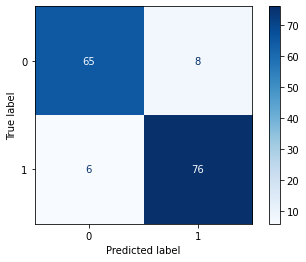

In [85]:
#pass it a trained model: it makes predictions for X_test and compares them to y_test
from sklearn.metrics import plot_confusion_matrix
disp= plot_confusion_matrix(bag, X_test,y_test, cmap="Blues", values_format=".2g")

In [119]:
from mlxtend.evaluate import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[65,  6],
       [ 8, 76]])

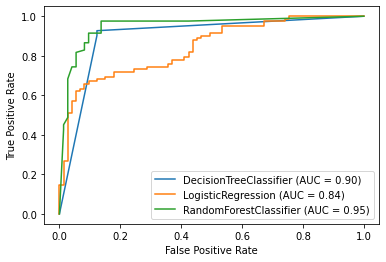

In [125]:
from sklearn.metrics import plot_roc_curve

disp=plot_roc_curve(dt, X_test, y_test)
plot_roc_curve(lr,X_test, y_test,ax=disp.ax_)
plot_roc_curve(rf,X_test, y_test, ax=disp.ax_)
plt.show()

In [127]:
import pickle as pk
pickle_out=open("classifier.pkl","wb")
pk.dump(rf,pickle_out)
pickle_out.close()

In [128]:
import sys
print("My Python version is:" , sys.version)

My Python version is: 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]


In [129]:
np.__version__

'1.18.5'

In [131]:
pip install --upgrade numpy


  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
Note: you may need to restart the kernel to use updated packages.    Uninstalling numpy-1.18.5:



ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy\\compat\\py3k.py'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.
